In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [326]:
pd.set_option('display.max_rows', 500)


In [327]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [328]:
houseprice = pd.read_csv('data/Ames_HousePrice_cleaned.csv')
houseprice

x_train = pd.read_csv('data/x_train_dummies.csv')
x_test = pd.read_csv('data/x_test_dummies.csv')
y_train = pd.read_csv('data/y_train_dummies.csv')
y_test = pd.read_csv('data/y_test_dummies.csv')

# exclude PIDs from analysis 
x_train.iloc[:,1:].head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,1080,7500,7,5,2004,2005,120.0,680.0,0.0,1080.0,1080,0,1,3,0,0.0,0,4,2008,2008.333333,3.333333,-93.679583,42.018564,3.068516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1382,8923,7,5,1998,1998,0.0,189.0,0.0,384.0,751,631,2,3,1,396.0,256,2,2009,2009.166667,11.166667,-93.646726,41.995512,2.328505,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,1446,21872,7,5,1996,1997,0.0,604.0,0.0,729.0,729,717,2,3,1,406.0,286,8,2008,2008.666667,11.666667,-93.627638,42.041394,1.334535,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1448,7500,8,5,2006,2007,238.0,24.0,0.0,1372.0,1448,0,2,2,1,692.0,140,6,2009,2009.500000,2.500000,-93.625760,42.029451,0.536280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1733,12394,7,5,2003,2003,0.0,0.0,0.0,847.0,847,886,2,3,1,433.0,148,10,2007,2007.833333,4.833333,-93.627242,42.051833,2.031786,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [329]:
x_train

,PID,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,531363060,1080,7500,7,5,2004,2005,120.0,680.0,0.0,1080.0,1080,0,1,3,0,0.0,0,4,2008,2008.333333,3.333333,-93.679583,42.018564,3.068516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,527161040,1382,8923,7,5,1998,1998,0.0,189.0,0.0,384.0,751,631,2,3,1,396.0,256,2,2009,2009.166667,11.166667,-93.646726,41.995512,2.328505,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,527107210,1446,21872,7,5,1996,1997,0.0,604.0,0.0,729.0,729,717,2,3,1,406.0,286,8,2008,2008.666667,11.666667,-93.627638,42.041394,1.334535,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,528458180,1448,7500,8,5,2006,2007,238.0,24.0,0.0,1372.0,1448,0,2,2,1,692.0,140,6,2009,2009.500000,2.500000,-93.625760,42.029451,0.536280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,527105140,1733,12394,7,5,2003,2003,0.0,0.0,0.0,847.0,847,886,2,3,1,433.0,148,10,2007,2007.833333,4.833333,-93.627242,42.051833,2.031786,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [330]:
print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(1799, 154)
(1799, 1)
(772, 154)
(772, 1)


In [331]:
y_train = np.log(y_train['SalePrice'])
y_test = np.log(y_test['SalePrice'])

### `Lasso Regression`

In [333]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# ss = StandardScaler()
# xtrain_scalar = ss.fit_transform(x_train)

alphas = np.logspace(-5,5,50)
lassocv = LassoCV(cv=8, max_iter =100000, normalize=True, random_state=0)
coefs_lassocv = [] 
result = {}
# trainscore = [] 
# testscore = [] 

for alpha in alphas:
    lassocv.fit(x_train.iloc[:,1:], y_train)
    coefs_lassocv.append(lassocv.coef_)
    result[alpha] = lassocv.score(x_test.iloc[:, 1:], y_test)

result
# alpha_best = lassocv.alpha_
# lassocv_coefs = lassocv.coef_


# trainscore.append(lassocv.score(x_train.iloc[:,1:], y_train))
# testscore.append(lassocv.score(x_test.iloc[:,1:], y_test))

# print('Best alpha: {}'.format(lassocv.alpha_))
# print('Train Score: {}'.format(trainscore))
# print('Test Score: {}'.format(testscore))

# the Lasso CV model provided the same scores as non CV Lasso 

# lasso=Lasso()
# alphas = np.logspace(-2,3,50)
# lasso.set_params(normalize=True)
# coefs_lasso = [] 
# result = {} 

# for alpha in alphas:
#    lasso.set_params(alpha = alpha)
#    lasso.fit(x_train.iloc[:,1:], y_train)
#    coefs_lasso.append(lasso.coef_)
#    result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

# result

{1e-05: 0.9305324013842244,
 1.5998587196060572e-05: 0.9305324013842244,
 2.559547922699533e-05: 0.9305324013842244,
 4.094915062380427e-05: 0.9305324013842244,
 6.55128556859551e-05: 0.9305324013842244,
 0.00010481131341546853: 0.9305324013842244,
 0.00016768329368110083: 0.9305324013842244,
 0.0002682695795279727: 0.9305324013842244,
 0.00042919342601287783: 0.9305324013842244,
 0.0006866488450042998: 0.9305324013842244,
 0.0010985411419875584: 0.9305324013842244,
 0.001757510624854793: 0.9305324013842244,
 0.002811768697974231: 0.9305324013842244,
 0.004498432668969444: 0.9305324013842244,
 0.0071968567300115215: 0.9305324013842244,
 0.011513953993264481: 0.9305324013842244,
 0.018420699693267165: 0.9305324013842244,
 0.029470517025518096: 0.9305324013842244,
 0.04714866363457394: 0.9305324013842244,
 0.07543120063354623: 0.9305324013842244,
 0.1206792640639329: 0.9305324013842244,
 0.19306977288832497: 0.9305324013842244,
 0.30888435964774846: 0.9305324013842244,
 0.494171336132383

In [334]:
coefs_lassocv = pd.DataFrame(coefs_lassocv, index=alphas, columns=x_train.columns[1:])
coefs_lassocv.head()


,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0.000010,0.000249,0.000002,0.063389,0.045409,0.001712,0.0,0.000017,0.000079,0.000031,0.000081,0.000007,0.0,0.0,-0.0,0.034288,0.000145,0.000064,-0.000937,-0.0,-0.001331,-0.000468,0.0349,-0.079462,-0.000065,-0.05766,-0.0,-0.0,0.003633,-0.0,0.000861,0.0,0.0,0.0,-0.06418,-0.0,-0.070103,-0.051968,-0.0,-0.006134,-0.169169,0.0,-0.0,-0.019216,0.002209,-0.048986,0.008377,0.0,0.005507,0.048548,0.026078,0.035858,0.021743,-0.009365,-0.015889,-0.0,0.0,-0.025296,0.012677,0.023517,0.0,0.119299,-0.040155,0.017192,0.0,0.511861,-0.0,0.0,-0.095801,-0.0,-0.00843,0.0,-0.010742,0.047342,0.093961,-0.023929,-0.023098,-0.003593,-0.020297,0.069951,0.10094,0.016675,0.033241,-0.0,-0.000662,-0.068425,-0.023442,-0.003886,-0.0,-0.0,0.0,-0.0,0.026592,0.003237,-0.0,0.0,0.0,0.011877,-0.0,-0.011043,-0.087899,-0.0,-0.0,0.004531,0.0,0.03252,-0.005587,0.063962,-0.031331,-0.028011,-0.0,0.0,-0.0,-0.00775,0.030928,0.131448,0.001134,0.027197,-0.008202,-0.010132,-0.0,0.011766,-0.004141,-0.001873,-0.000331,-0.015524,0.048108,0.0,-0.0,0.005874,-0.011438,-0.007194,-0.072228,-0.022036,0.066719,-0.046654,-0.018196,0.070206,-0.030972,0.013413,-0.013788,-0.0,0.0,-0.0,0.0,0.033893,0.0,0.055095,-0.03806,0.072124,0.100558,0.0,0.0,-0.0
0.000016,0.000249,0.000002,0.063389,0.045409,0.001712,0.0,0.000017,0.000079,0.000031,0.000081,0.000007,0.0,0.0,-0.0,0.034288,0.000145,0.000064,-0.000937,-0.0,-0.001331,-0.000468,0.0349,-0.079462,-0.000065,-0.05766,-0.0,-0.0,0.003633,-0.0,0.000861,0.0,0.0,0.0,-0.06418,-0.0,-0.070103,-0.051968,-0.0,-0.006134,-0.169169,0.0,-0.0,-0.019216,0.002209,-0.048986,0.008377,0.0,0.005507,0.048548,0.026078,0.035858,0.021743,-0.009365,-0.015889,-0.0,0.0,-0.025296,0.012677,0.023517,0.0,0.119299,-0.040155,0.017192,0.0,0.511861,-0.0,0.0,-0.095801,-0.0,-0.00843,0.0,-0.010742,0.047342,0.093961,-0.023929,-0.023098,-0.003593,-0.020297,0.069951,0.10094,0.016675,0.033241,-0.0,-0.000662,-0.068425,-0.023442,-0.003886,-0.0,-0.0,0.0,-0.0,0.026592,0.003237,-0.0,0.0,0.0,0.011877,-0.0,-0.011043,-0.087899,-0.0,-0.0,0.004531,0.0,0.03252,-0.005587,0.063962,-0.031331,-0.028011,-0.0,0.0,-0.0,-0.00775,0.030928,0.131448,0.001134,0.027197,-0.008202,-0.010132,-0.0,0.011766,-0.004141,-0.001873,-0.000331,-0.015524,0.048108,0.0,-0.0,0.005874,-0.011438,-0.007194,-0.072228,-0.022036,0.066719,-0.046654,-0.018196,0.070206,-0.030972,0.013413,-0.013788,-0.0,0.0,-0.0,0.0,0.033893,0.0,0.055095,-0.03806,0.072124,0.100558,0.0,0.0,-0.0
0.000026,0.000249,0.000002,0.063389,0.045409,0.001712,0.0,0.000017,0.000079,0.000031,0.000081,0.000007,0.0,0.0,-0.0,0.034288,0.000145,0.000064,-0.000937,-0.0,-

In [335]:
lassocv.alpha_

3.2631419548671764e-05

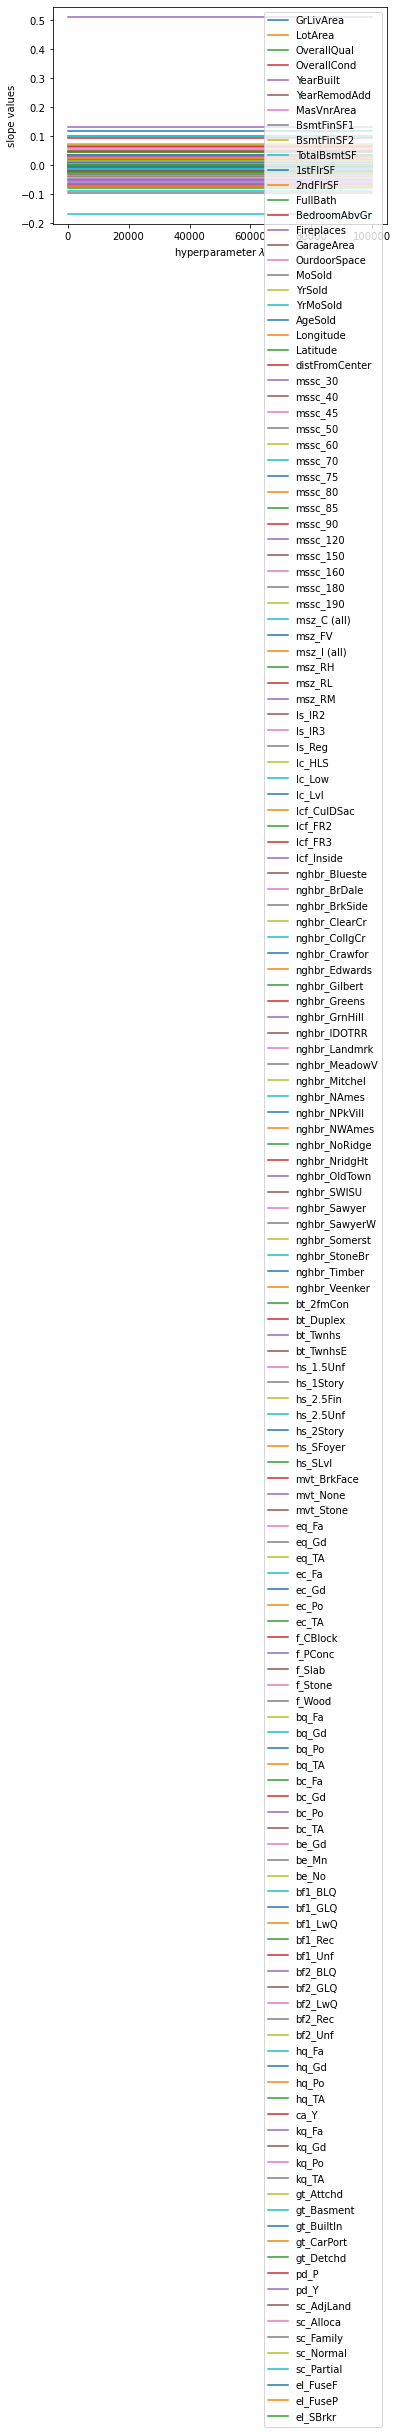

In [336]:
for name in coefs_lassocv.columns:
    plt.plot(coefs_lassocv.index, coefs_lassocv[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)

In [345]:
lasso=Lasso()
alphas = np.logspace(-10,0,50)
lasso.set_params(normalize=True)
coefs_lasso = [] 
result = {} 

for alpha in alphas:
   lasso.set_params(alpha = alpha)
   lasso.fit(x_train.iloc[:,1:], y_train)
   coefs_lasso.append(lasso.coef_)
   result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

result
# best alpha  54.286754393238596

/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+01, tolerance: 2.732e-02
  model = cd_fast.enet_coordinate_descent(
/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+01, tolerance: 2.732e-02
  model = cd_fast.enet_coordinate_descent(
/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

{1e-10: 0.9280570123515024,
 1.5998587196060573e-10: 0.9280570364684665,
 2.5595479226995335e-10: 0.9280570750519236,
 4.0949150623804193e-10: 0.9280571367792932,
 6.551285568595495e-10: 0.9280572355325453,
 1.0481131341546874e-09: 0.9280573935191426,
 1.67683293681101e-09: 0.9280576462634627,
 2.6826957952797275e-09: 0.9280580505880857,
 4.291934260128778e-09: 0.9280586975352373,
 6.866488450042998e-09: 0.9280597321965414,
 1.0985411419875573e-08: 0.9280613868443297,
 1.757510624854793e-08: 0.92806403310754,
 2.8117686979742307e-08: 0.9280682627216954,
 4.498432668969444e-08: 0.9280751522179245,
 7.196856730011529e-08: 0.9280860186034018,
 1.1513953993264481e-07: 0.928103348432057,
 1.8420699693267165e-07: 0.9281309311628774,
 2.94705170255181e-07: 0.9281746881146364,
 4.7148663634573897e-07: 0.9282342161872703,
 7.543120063354623e-07: 0.9282811623554748,
 1.2067926406393288e-06: 0.9283727023568159,
 1.9306977288832498e-06: 0.9285031255124049,
 3.088843596477485e-06: 0.928698769611513

In [346]:
coefs_lasso

[array([ 1.71715294e-04,  1.57178123e-06,  5.71472848e-02,  4.72424253e-02,
         1.75320504e-03,  2.35392437e-03,  1.96846582e-05,  7.09439438e-05,
         6.69607979e-05,  6.04739525e-05,  9.94301362e-05,  9.26027300e-05,
         7.69673379e-03, -4.03654655e-03,  3.38101908e-02,  1.36780640e-04,
         6.84858189e-05, -1.82284195e-03, -4.82649507e-03, -1.22272708e-04,
         2.02776680e-03,  6.72911003e-02, -1.90887742e-01, -9.13665087e-04,
        -5.10997567e-02, -1.27491432e-02,  4.82510298e-02,  3.21442035e-02,
        -1.89325029e-02,  1.83256494e-02,  3.37469547e-02, -7.21689732e-02,
        -2.67901654e-02, -8.90622720e-02, -3.31149358e-02, -1.38624947e-01,
        -9.67577121e-02, -7.73195551e-02, -5.63208118e-02, -2.25180186e-01,
        -3.67313292e-02, -7.34302010e-02, -5.98214329e-02, -3.49206430e-02,
        -8.43704057e-02,  2.46577662e-02,  3.32208655e-02,  1.67159857e-02,
         7.69532873e-02,  5.92830995e-02,  6.86826016e-02,  2.33846464e-02,
        -2.6

In [347]:
lasso.coef_

array([ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,
        0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,
        0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.])

In [348]:
coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns = x_train.columns[1:])
coefs_lasso.head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
1.000000e-10,0.000172,0.000002,0.057147,0.047242,0.001753,0.002354,0.00002,0.000071,0.000067,0.00006,0.000099,0.000093,0.007697,-0.004037,0.03381,0.000137,0.000068,-0.001823,-0.004826,-0.000122,0.002028,0.067291,-0.190888,-0.000914,-0.0511,-0.012749,0.048251,0.032144,-0.018933,0.018326,0.033747,-0.072169,-0.026790,-0.089062,-0.033115,-0.138625,-0.096758,-0.077320,-0.056321,-0.225180,-0.036731,-0.073430,-0.059821,-0.034921,-0.084370,0.024658,0.033221,0.016716,0.076953,0.059283,0.068683,0.023385,-0.026654,-0.04476,-0.006632,0.027669,-0.025,0.015950,0.041080,0.010689,0.126786,-0.047285,0.039568,0.049731,0.608280,-0.006478,0.057837,-0.10512,-0.004721,-0.011774,0.017858,-0.015968,0.072175,0.102407,-0.038799,-0.037645,-0.010152,-0.017116,0.089069,0.127902,0.033407,0.065580,0.047431,0.016391,-0.054967,-0.008149,-0.034281,0.019226,-0.001798,0.012609,0.019501,0.077983,0.091539,0.025504,0.025867,0.027923,0.058574,0.007966,-0.001530,-0.080065,0.021482,-0.023513,0.032896,0.010971,0.037763,0.002038,0.111578,-0.045349,-0.069356,-0.026816,0.0,-0.027947,0.055287,0.100754,0.264409,0.069897,0.020069,-0.015952,-0.014888,-0.014625,0.003090,-0.026881,-0.017472,-0.018365,-0.01762,0.047856,0.014125,0.002578,0.026544,-0.025118,-0.017667,-0.160721,-0.026431,0.068391,-0.093727,-0.054905,0.101598,-0.066738,0.009953,-0.028973,-0.018910,0.018505,-0.004315,0.016462,0.044125,0.039604,0.097573,-0.025693,0.092101,0.119622,0.017037,0.048095,0.000844
1.599859e-10,0.000172,0.000002,0.057147,0.047242,0.001753,0.002354,0.00002,0.000071,0.000067,0.00006,0.000099,0.000093,0.007697,-0.004037,0.03381,0.000137,0.000068,-0.001823,-0.004826,-0.000123,0.002028,0.067291,-0.190888,-0.000914,-0.0511,-0.012749,0.048250,0.032144,-0.018932,0.018326,0.033747,-0.072169,-0.026790,-0.089034,-0.033115,-0.138625,-0.096757,-0.077319,-0.056320,-0.225175,-0.036726,-0.073425,-0.059816,-0.034915,-0.084365,0.024658,0.033221,0.016716,0.076953,0.059283,0.068682,0.023385,-0.026654,-0.04476,-0.006632,0.027669,-0.025,0.015949,0.041080,0.010689,0.126786,-0.047285,0.039568,0.049731,0.608280,-0.006478,0.057836,-0.10512,-0.004721,-0.011774,0.017858,-0.015968,0.072175,0.102407,-0.038799,-0.037645,-0.010152,-0.017116,0.089069,0.127902,0.033407,0.065579,0.047430,0.016363,-0.054968,-0.008149,-0.034280,0.019226,-0.001798,0.012609,0.019501,0.077983,0.091538,0.025503,0.025867,0.027923,0.058574,0.007966,-0.001530,-0.080065,0.021482,-0.023513,0.032895,0.010971,0.037763,0.002038,0.111578,-0.045349,-0.069355,-0.026816,0.0,-0.027946,0.055286,0.100753,0.264408,0.069897,0.020069,-0.015952,-0.014888,-0.0

Text(0, 0.5, 'slope values')

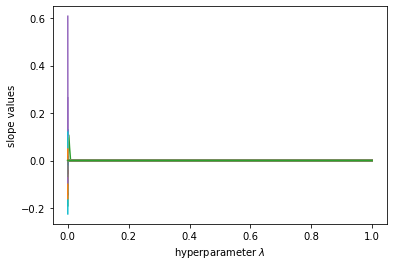

In [349]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')


### `Ridge Regression`

In [350]:
y_train.head()

0    11.856515
1    12.086726
2    12.072541
3    12.382125
4    12.323856
Name: SalePrice, dtype: float64

In [354]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

ridge_alphas = np.logspace(-2, 5, 100)
ridgecv = RidgeCV(alphas = ridge_alphas, cv = 8, normalize=True)

trainscore = [] 
testscore = [] 

ridgecv.fit(x_train, y_train)

ralpha_best = ridgecv.alpha_
coefs = ridgecv.coef_

trainscore.append(ridgecv.score(x_train, y_train))
testscore.append(ridgecv.score(x_test, y_test))

print('Best alpha: {}'.format(ralpha_best))
print('Train Score: {}'.format(trainscore))
print('Test Score: {}'.format(testscore))

# why are the Ridge CV results so different from the regular ridge regression results?


Best alpha: 0.0509413801481638
Train Score: [0.9255025416322525]
Test Score: [0.9313358214197965]


In [356]:
alpha2 = np.arange(0,20)
ridge = Ridge()
ridge.set_params(normalize=False)
coefs_ridge = [] 
results = {}

for alpha in alpha2: 
    ridge.set_params(alpha=alpha)
    ridge.fit(x_train.iloc[:,1:], y_train)
    coefs_ridge.append(ridge.coef_)
    results[alpha] = ridge.score(x_test.iloc[:,1:], y_test)

coefs_ridge = pd.DataFrame(coefs_ridge, index = alpha2, columns = x_train.columns[1:])
coefs_ridge.head()



,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,0.000164,0.000002,0.057214,0.047272,0.001766,594270.670088,0.000020,0.000070,0.000066,0.000061,0.000108,0.000101,0.007890,-0.004228,0.033791,0.000136,0.000068,-50185.971764,-602231.643883,7960.971097,594270.669770,0.069476,-0.200552,-0.001082,-0.051005,-0.011590,0.045526,0.032939,-0.019275,0.017973,0.031261,-0.070317,-0.024130,1.464315e+09,-0.033279,-0.132015,-0.096865,-0.075403,-0.054131,-0.226541,-0.037178,-0.073784,-0.060701,-0.035476,-0.085401,0.023683,0.033357,0.016748,0.076071,0.059023,0.068526,0.023642,-0.026338,-0.043798,-0.006618,0.027913,-0.024793,0.016136,0.041605,0.010631,0.126331,-0.046605,0.039701,0.052752,0.606951,-0.005625,0.057643,-0.105168,-0.004385,-0.011105,0.020567,-0.016553,0.073034,0.102506,-0.039026,-0.038315,-0.009893,-0.016594,0.088973,0.129702,0.034101,0.065610,0.044953,-1.464315e+09,-0.056043,-0.008744,-0.029728,0.019537,0.003078,0.015023,0.020040,0.077079,0.089955,0.024553,0.025128,0.027509,0.057930,0.007897,-0.001698,-0.082551,0.019731,-0.030035,0.030863,0.010178,0.036794,0.002223,0.112737,-0.044090,-0.070179,-0.027219,3.128738e+07,-0.028398,0.056431,0.101965,0.266423,0.071628,0.019431,-0.016041,-0.015398,-0.015314,0.003426,-0.026626,-0.017628,-0.018723,-0.017554,0.048643,0.014219,0.001427,0.026251,-0.024530,-0.017154,-0.162411,-0.026403,0.067539,-0.093166,-0.054645,0.104225,-0.066209,0.010481,-0.029214,-0.018862,0.018951,-0.003488,0.016170,0.043735,0.045096,0.095978,-0.023582,0.091383,0.119007,0.016484,0.046955,0.001299
1,0.000165,0.000002,0.058042,0.046998,0.001742,-0.000416,0.000023,0.000073,0.000067,0.000065,0.000104,0.000102,0.005573,-0.004283,0.033127,0.000135,0.000068,-0.001500,-0.001061,-0.001184,-0.000770,0.020366,-0.060142,-0.001843,-0.050154,-0.011432,0.019263,0.031954,-0.011064,0.024374,0.031619,-0.043013,-0.007860,-3.365834e-02,-0.010674,-0.052466,-0.068683,-0.036843,-0.023018,-0.131729,0.037821,-0.005130,0.012778,0.038803,-0.005595,0.021761,0.027860,0.013937,0.071246,0.054330,0.063379,0.023625,-0.025233,-0.041659,-0.005188,0.003410,-0.046550,-0.008936,0.016585,-0.009875,0.102198,-0.066776,0.017819,0.021063,0.373539,-0.036144,0.020261,-0.121337,-0.024057,-0.032258,0.001566,-0.035675,0.045537,0.079542,-0.063216,-0.055927,-0.030979,-0.038464,0.066486,0.099257,0.010967,0.036526,0.018234,-3.365834e-02,-0.076774,-0.028362,-0.015818,0.019914,0.000900,0.011596,0.012273,0.062673,0.065673,0.021417,0.022888,0.023740,0.049762,0.002714,-0.008191,-0.067046,0.026066,-0.012173,0.037570,0.009858,0.036299,-0.016907,0.091280,-0.038584,-0.058326,-0.022856,0.000000e+00,-0.022693,0.025994,0.072

In [357]:
ridge.coef_

array([ 1.56291579e-04,  1.87657729e-06,  6.53826693e-02,  4.86288825e-02,
        2.06281996e-03, -4.08694919e-04,  3.45017031e-05,  7.50397601e-05,
        6.68976957e-05,  7.96659850e-05,  1.12740904e-04,  1.16862226e-04,
        9.15595190e-04, -6.15253688e-03,  3.28424891e-02,  1.44245187e-04,
        6.87179493e-05, -1.31633841e-03, -1.19830523e-03, -1.30791377e-03,
       -8.99304492e-04,  1.53480026e-03, -4.17898176e-03, -2.28009797e-03,
       -3.80921023e-02, -1.38185882e-03, -7.92881047e-04,  2.04743057e-02,
       -3.00342538e-04,  2.92200197e-02,  1.01339884e-02,  7.12871509e-04,
        1.49610366e-02, -2.56595376e-02, -2.56692820e-03, -6.22878206e-03,
       -5.23970498e-02, -1.36346808e-02, -4.91826773e-03, -5.10920299e-02,
        3.31904232e-02, -2.79089541e-04, -2.53697876e-03,  3.71203697e-02,
       -1.86780036e-02,  1.08170669e-02,  3.92463990e-03,  6.41761700e-03,
        4.11251740e-02,  1.46940262e-02,  3.12564470e-02,  1.97875966e-02,
       -1.65964155e-02, -

In [358]:
results
# highest R^2 observed when alpha =  ~8

{0: -17364695743539.137,
 1: 0.9294991715765853,
 2: 0.9298990790585928,
 3: 0.9301307067856366,
 4: 0.9302800576389642,
 5: 0.930376498346288,
 6: 0.9304354550092226,
 7: 0.9304666057376576,
 8: 0.9304765603032591,
 9: 0.9304700563166041,
 10: 0.9304505992652107,
 11: 0.9304208439342476,
 12: 0.9303828377224234,
 13: 0.9303381832353815,
 14: 0.9302881506958733,
 15: 0.930233757738323,
 16: 0.9301758272774251,
 17: 0.9301150302360914,
 18: 0.9300519175846715,
 19: 0.9299869446918838}

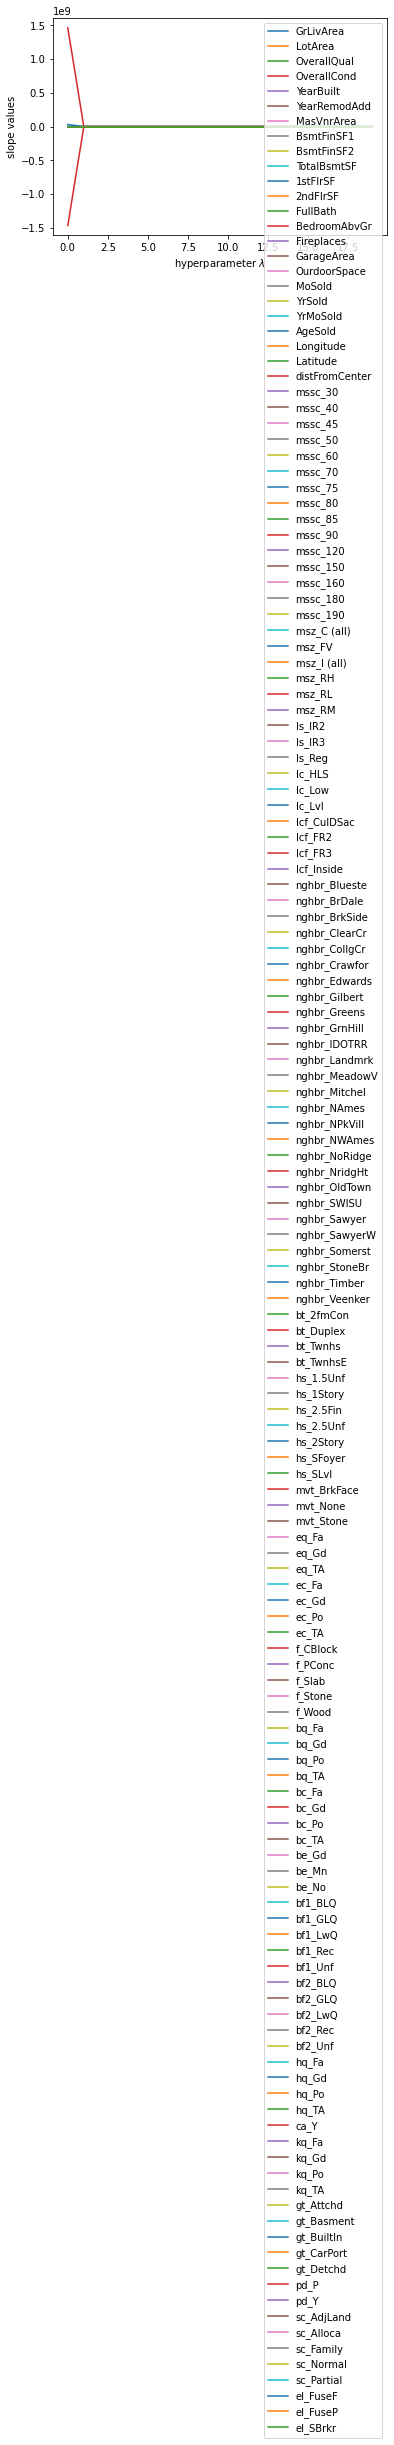

In [359]:
# plotting 
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)


# Now not all the lines are appearing?

In [100]:
coefs_ridge

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,50.193835,0.404278,8460.809254,6393.654412,361.534174,1.111614e+11,30.195135,22.038285,18.988920,13.764949,...,-4360.058672,1755.216150,-11885.920563,2743.511343,-13558.171811,4804.854750,15515.346589,5895.578787,-2390.561059,-729.328854
1,50.918188,0.419074,8782.704670,6299.327172,364.311291,-6.443031e+01,31.179293,22.381384,18.658514,14.289164,...,-3978.395003,1824.428971,-5544.072764,2376.048531,-13262.091700,4902.144798,16007.791696,4992.663642,-1978.324396,-941.976188
2,51.225049,0.426161,9046.351920,6274.649081,369.096055,-6.311196e+01,32.022609,22.467811,18.451756,14.702889,...,-3719.177287,1818.777363,-3755.309889,1814.007284,-12713.835208,4785.073311,16001.224313,4664.889844,-1549.248998,-1009.601981
3,51.349191,0.430973,9265.208511,6268.086755,373.669278,-6.136576e+01,32.800147,22.500385,18.338843,15.047834,...,-3531.013398,1779.308591,-2903.771626,1428.576828,-12169.617590,4621.210892,15867.256303,4436.380188,-1327.744788,-1074.208017
4,51.366624,0.434568,9453.420713,6268.149686,377.846346,-5.948367e+01,33.518540,22.510652,18.264083,15.343160,...,-3381.285865,1728.092926,-2400.619849,1157.871129,-11655.273099,4439.679193,15676.047719,4247.876730,-1210.122266,-1136.539468
5,51.320635,0.437388,9618.780067,6270.887605,381.618858,-5.760835e+01,34.183952,22.509781,18.204931,15.600164,...,-3255.676262,1673.281343,-2066.393348,959.769843,-11176.749297,4252.253112,15456.106166,4082.898176,-1143.562576,-1195.664829
6,51.235998,0.439665,9766.183622,6274.672108,385.017433,-5.580046e+01,34.802340,22.502744,18.151729,15.826550,...,-3146.782209,1618.239091,-1827.211672,809.541710,-10733.670449,4064.691541,15221.920207,3934.660221,-1102.923679,-1251.146160
7,51.127539,0.441541,9898.987539,6278.759182,388.080384,-5.408345e+01,35.379022,22.492084,18.100158,16.027904,...,-3050.284447,1564.439442,-1646.922457,692.270124,-10323.622778,3880.080162,14981.703640,3799.569959,-1075.777573,-1302.904278
8,51.004481,0.443110,10019.629614,6282.788931,390.844930,-5.246376e+01,35.918592,22.479237,18.048280,16.208433,...,-2963.428984,1512.525323,-1505.699035,598.549679,-9943.660642,3700.132038,14740.395015,3675.373929,-1055.731918,-1351.044970
9,50.872745,0.444436,10129.954997,6286.583707,393.344716,-5.094003e+01,36.424977,22.465068,17.995284,16.371398,...,-2884.339113,1462.748922,-1391.745417,522.194544,-9590.861073,3525.789860,14501.056398,3560.491302,-1039.399260,-1395.759112


### `Elastic Net`

A hybrid penalized model which has two hyperparameters (alpha & rho). 
Alpha: equivalence of lambda, and controls the regularization strength
Rho: controls which mixture of Ridge and Lasso to use 


In [370]:
from sklearn.linear_model import ElasticNet 

n_rho = 20
n_alpha = 40
alpharange = np.logspace(-2,5, n_alpha)
rhorange = np.linspace(0.1,1, n_rho) 
scores = np.zeros((n_rho, n_alpha))

elasticnet = ElasticNet(max_iter=10000, normalize=True)

for alphaIdx, alpha in enumerate(alpharange):
    for rhoIdx, rho in enumerate(rhorange):
        elasticnet.set_params(alpha=alpha, l1_ratio = rho)
        elasticnet.fit(x_train, y_train)
        scores[rhoIdx, alphaIdx] = elasticnet.score(x_test, y_test)


In [371]:
elasticnet.score(x_train, y_train)

0.0

In [ ]:
# random search
# rmse by alpha plot 

### `Random Forest` 

In [493]:
# using the more minimal dataset selected by Lasso Regression 
# scaling not required for random forest models - no regression coefficient analogue produced in model output 

from sklearn.model_selection import train_test_split

cl_x = pd.read_csv('../data/Ames_X2.csv')
cl_y = pd.read_csv('../data/Ames_Y2.csv')

cl_x = cl_x.drop(['Unnamed: 0'], axis=1)
cl_y = cl_y.drop(['Unnamed: 0'], axis=1)

cl_x_dummies = pd.get_dummies(cl_x, drop_first=True)
cl_x_dummies = cl_x_dummies.fillna(0)


x_train, x_test, y_train, y_test = train_test_split(cl_x_dummies, cl_y, test_size = 0.3, random_state = 0)

y_train =np.log(y_train['SalePrice'])
y_train

y_test = np.log(y_test['SalePrice'])
y_test 


841     11.608236
2329    11.289782
936     11.867799
618     12.278393
1801    12.365211
          ...    
2226    11.849398
1000    12.533576
655     12.149502
2090    12.144197
553     11.320554
Name: SalePrice, Length: 772, dtype: float64

In [494]:
cl_x.columns

Index(['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'HeatingQC', '1stFlrSF', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'perc_1stflr', 'house_footprint',
       'RoomSize', 'Bsmt_Y', 'AgeSold', 'gaudist_LincolnGrand',
       'gaudist_GreekCircle', 'gaudist_OntarioND', 'gaudist_Grand24',
       'gaudist_BloomStange', 'BsmtBath', 'Bath', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood'],
      dtype='object')

In [495]:
pd.set_option('display.max_columns', None)
x_train.head()

,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,HeatingQC,1stFlrSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,perc_1stflr,house_footprint,RoomSize,Bsmt_Y,AgeSold,gaudist_LincolnGrand,gaudist_GreekCircle,gaudist_OntarioND,gaudist_Grand24,gaudist_BloomStange,BsmtBath,Bath,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
1083,5,5,0,0.0,0.0,0,943,2,0,5,0,2.0,100.000000,11.228864,188.600000,1,40,0.017867,0.199075,0.950449,0.011854,0.061136,1.0,1.0,0,0,0,1,0,0,0,0
279,7,5,5,5.0,0.0,10,784,3,5,6,0,2.0,48.665425,9.333333,268.500000,1,1,0.007378,0.132977,0.458827,0.001281,0.005034,0.0,2.5,0,0,0,0,1,0,0,0
1051,5,5,0,0.0,-5.0,10,760,3,0,5,0,2.0,56.088561,12.216685,271.000000,1,57,0.581384,0.976085,0.097358,0.116519,0.040586,0.0,2.0,1,0,0,1,0,0,0,0
253,6,6,0,0.0,-5.0,10,1260,4,0,9,1,2.0,54.997818,17.500000,254.555556,1,9,0.891162,0.292788,0.004874,0.443831,0.046857,0.5,2.0,1,0,0,0,0,0,0,0
663,10,5,10,10.0,0.0,10,1026,3,10,10,1,3.0,51.121076,9.324730,200.700000,1,1,0.086380,0.113965,0.114130,0.502783,0.962632,1.0,2.5,0,0,0,0,1,0,0,0


In [496]:
print(x_train.shape)
print(x_test.shape)

(1799, 32)
(772, 32)


In [519]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

forestregressor = ensemble.RandomForestRegressor() 

forestregressor = RandomForestRegressor(n_estimators=1000,max_features=7)

forestregressor.fit(x_train,y_train)

print(f'R^2 of Train set: {forestregressor.score(x_train,y_train)}')
print(f'R^2 Test set: {forestregressor.score(x_test,y_test)}')


R^2 of Train set: 0.9835327881319706
R^2 Test set: 0.8983631737929255


          feature  importance
0   b'OverallQua'    0.218515
1    b'ExterQual'    0.082833
2     b'1stFlrSF'    0.081008
3   b'GarageCars'    0.080876
4         b'Bath'    0.069619
5   b'KitchenQua'    0.064828
6     b'BsmtQual'    0.064775
7     b'RoomSize'    0.048131
8      b'AgeSold'    0.036032
9   b'Fireplaces'    0.032531
10  b'TotRmsAbvG'    0.026801
11  b'OverallCon'    0.021312
12  b'gaudist_Li'    0.020982
13  b'gaudist_Bl'    0.020777
14  b'Foundation'    0.017160
15  b'house_foot'    0.017150
16  b'gaudist_Gr'    0.016127
17  b'gaudist_On'    0.015031
18  b'gaudist_Gr'    0.012601
19  b'BedroomAbv'    0.010846


Text(0, 0.5, 'Importance')

<Figure size 576x864 with 0 Axes>

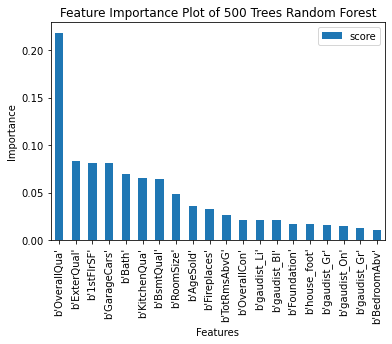

In [589]:
feature_importance_forest = list(zip(x_train.columns, forestregressor.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance_forest = np.array(feature_importance_forest, dtype=dtype)
feature_sort_forest = np.sort(feature_importance_forest, order='importance')[::-1]
name, score = zip(*list(feature_sort_forest))

print(pd.DataFrame(feature_sort_forest[:20]))
plt.figure(figsize = (8,12))
pd.DataFrame({'name':name,'score':score})[:20].plot.bar(x='name', y='score')
plt.title('Feature Importance Plot of 500 Trees Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')



### `Random Forest with CV`

In [524]:
# set grid of parameters 
forest_para_grid = [{
    'n_estimators': [100, 500, 1000],
    'max_features': [5, 6, 7, 8],
    'criterion': ['squared_error'],
    'random_state': [0],
    'min_samples_leaf': range(1, 10),
    'min_samples_split': np.linspace(2, 30, 15, dtype=int)
}]

# set cv parameters 
forest_grid_search = GridSearchCV(forestregressor, forest_para_grid, cv = 5, scoring='r2', n_jobs=-1)

forest_grid_search.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=7, n_estimators=1000),
             n_jobs=-1,
             param_grid=[{'criterion': ['squared_error'],
                          'max_features': [5, 6, 7, 8],
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [100, 500, 1000],
                          'random_state': [0]}],
             scoring='r2')

In [525]:
y_train.shape

(1799,)

In [526]:
print(f'Random Forest Grid Search Best Parameters: {forest_grid_search.best_params_}')


Random Forest Grid Search Best Parameters: {'criterion': 'squared_error', 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 0}


In [527]:

print(f'RF Grid Search R2 of Train set: {forest_grid_search.score(x_train,y_train)}')
print(f'RF Grid Search R2 of Test set: {forest_grid_search.score(x_test,y_test)}')

RF Grid Search R2 of Train set: 0.9837275729325385
RF Grid Search R2 of Test set: 0.8986772286176374


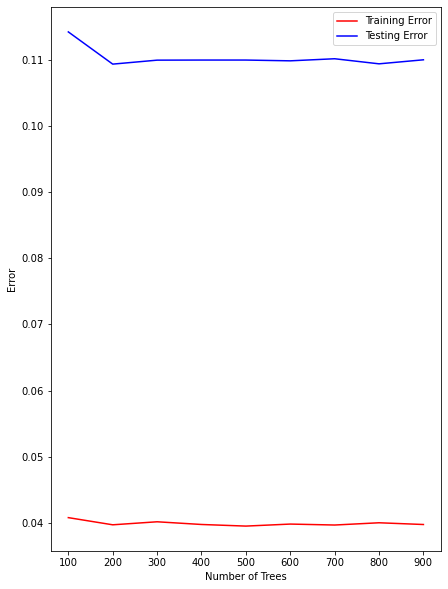

In [482]:

n_trees_range = range(100, 1000, 100)   #OOB score will warning if too few times 
train_error = [] 
test_error = [] 

for n_trees in n_trees_range: 
    randomForest.set_params(n_estimators=n_trees)
    randomForest.fit(x_train, y_train)
    train_error.append(1 - randomForest.score(x_train,y_train))
    test_error.append(1 - randomForest.score(x_test,y_test))


plt.figure(figsize = (7,10))
plt.plot(n_trees_range, train_error, c='red', label='Training Error')
plt.plot(n_trees_range, test_error, c='blue', label='Testing Error')
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

### `Gradient Boosting`

In [377]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbm = GradientBoostingRegressor()

In [546]:
gbm.set_params(
    learning_rate = 0.01,
    n_estimators = 5000,
    verbose=1,
    warm_start=False,
    loss = 'ls',
    max_features=6, 
    min_impurity_decrease=0.01,
    random_state=0
)

gbm.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1478            8.60s
         2           0.1460            7.28s
         3           0.1444            6.74s
         4           0.1428            6.47s
         5           0.1412            6.33s
         6           0.1395            6.36s
         7           0.1379            6.42s
         8           0.1362            6.81s
         9           0.1346            6.98s
        10           0.1330            7.32s
        20           0.1184            8.48s
        30           0.1054            8.18s
        40           0.0945            7.70s
        50           0.0853            7.46s
        60           0.0771            7.10s
        70           0.0700            6.83s
        80           0.0640            6.57s
        90           0.0584            6.40s
       100           0.0537            6.23s
       200           0.0278            5.39s
       300           0.0189            5.13s
       40

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_features=6,
                          min_impurity_decrease=0.01, n_estimators=5000,
                          random_state=0, verbose=1)

R^2 of Train set: 0.955702108547499
R^2 Test set: 0.9228245887226518


Text(0.5, 1.0, 'Feature Importance Plot of 5000 Tree Gradient Boost')

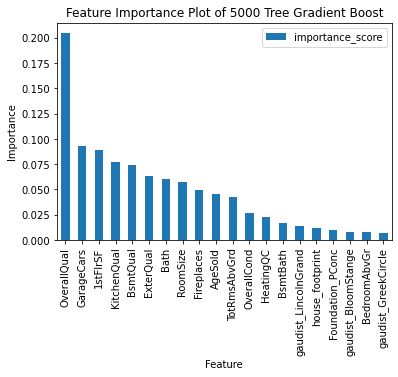

In [588]:
print(f'R^2 of Train set: {gbm.score(x_train, y_train)}')
print(f'R^2 Test set: {gbm.score(x_test, y_test)}')
sorted_importance = sorted(zip(x_train.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance) 
pd.DataFrame({'feature_name':a, 'importance_score':b})[:20].plot.bar(x='feature_name') 
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot of 5000 Tree Gradient Boost')

### `XG Boosting`

In [487]:
# speed and performance enhancements from Gradient Boosting algoirthm (10x faster) 

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

print(xgboost.__version__)

1.6.1


In [584]:
xgb = XGBRegressor()
xgb.set_params(
    eta = 0.01,
    n_estimators = 5000,
    gamma=0.01,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 0
)

xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=5000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [585]:
print(xgb.objective)
print()

print(f'R^2 of Train set: {xgb.score(x_train, y_train)}')
print(f'R^2 Test set: {xgb.score(x_test, y_test)}')

reg:squarederror

R^2 of Train set: 0.9922122934972577
R^2 Test set: 0.9230248806127308


Text(0, 0.5, 'Importance')

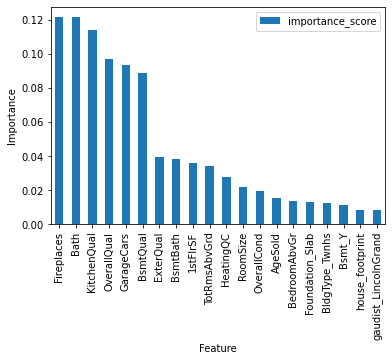

In [587]:
sorted_importance = sorted(zip(x_train.columns, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance) 
pd.DataFrame({'feature_name':a, 'importance_score':b})[:20].plot.bar(x='feature_name')
plt.xlabel('Feature')
plt.ylabel('Importance')


In [594]:
xgb_grid = [{
    'n_estimators': range(4000,7000,500),
    'eta': [0.01],
    'random_state': [0],
    'gamma': [0.01],
    'subsample': [0.5, 0.6, 0.7, 0.8],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'max_depth': range(2, 7, 1)
    
}]

xgb_grid_search = GridSearchCV(xgb, xgb_grid, cv = 3, scoring='r2', n_jobs=-1)

xgb_grid_search.fit(x_train, y_train)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eta=0.01,
                                    eval_metric=None, gamma=0.01, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.00999999978, max...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()',
                                    n_estimators=5000, n_jobs=0,
                                    num_parallel_tree=1, predictor='auto',
                    

In [596]:
print(f'XGBoost Grid Search Best Parameters: {xgb_grid_search.best_params_}')
print(f'XGBoost Grid Search R2 of Train set: {xgb_grid_search.score(x_train,y_train)}')
print(f'XGBoost Grid Search R2 of Test set: {xgb_grid_search.score(x_test,y_test)}')
print(f'XGBoost Best Score: {xgb_grid_search.best_score_}')

XGBoost Grid Search Best Parameters: {'colsample_bytree': 0.5, 'eta': 0.01, 'gamma': 0.01, 'max_depth': 4, 'n_estimators': 5500, 'random_state': 0, 'subsample': 0.7}
XGBoost Grid Search R2 of Train set: 0.9887700819050983
XGBoost Grid Search R2 of Test set: 0.9223550274366806
XGBoost Best Score: 0.8996089058528952


### `SVM`

In [598]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

standscale = StandardScaler()

x_train = standscale.fit_transform(x_train)
y_train = np.array(y_train).reshape(-1,1)
x_test = standscale.fit_transform(x_test)
y_test = np.array(y_test).reshape(-1,1)

In [617]:
svr = SVR(epsilon = 1e-4, gamma=0.01)
svr.set_params(kernel='rbf')
svr.fit(x_train, y_train)

print(f'SVR R2 of Train set: {svr.score(x_train,y_train)}')
print(f'SVR R2 of Test set: {svr.score(x_test,y_test)}')

/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR R2 of Train set: 0.9350211035745686
SVR R2 of Test set: 0.9158632105927962


In [618]:
y_train2 = standscale.fit_transform(np.array(y_train).reshape(-1,1))
y_test2 = standscale.fit_transform(np.array(y_test).reshape(-1,1))

In [623]:
# scaling dependent target variable does not impact score much 

svr = SVR(epsilon = 1e-4, gamma=0.01)
svr.set_params(kernel='rbf')
svr.fit(x_train, y_train2)

print(f'SVR R2 of Train set: {svr.score(x_train,y_train2)}')
print(f'SVR R2 of Test set: {svr.score(x_test,y_test2)}')

/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR R2 of Train set: 0.921482397409116
SVR R2 of Test set: 0.9112875235878372
